In [12]:
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import cv2
import math

In [13]:
lenght = 3
Level = 0.7
N = 50
grid_size = 2*lenght/(N-1)

In [14]:
grid_size

0.12244897959183673

In [15]:
def draw_regular_polygon(n, l = lenght):
    # Calculate the angles for each vertex
    angles = np.linspace(0, 2*np.pi, n+1)

    # Calculate the x and y coordinates of the vertices
    x = l * np.cos(angles)
    y = l * np.sin(angles)

    sides = []
    points = []
    for i in range(n):
        x1, y1 = x[i], y[i]
        points.append((x1, y1))
        x2, y2 = x[(i+1) % n], y[(i+1) % n]
        sides.append([(x1, y1), (x2, y2)])

    # Create the plot
    plt.plot(x, y, 'k')

    return sides,points


In [16]:
#Especifco el nivel que quiera
def distance_point_line(point, line):
    # Step 1: Find the projection of the point onto the line containing the segment
    x, y = point
    (x1, y1), (x2, y2) = line
    v_x = x2 - x1
    v_y = y2 - y1
    w_x = x - x1
    w_y = y - y1
    dot_product = v_x * w_x + v_y * w_y
    length_squared = v_x * v_x + v_y * v_y
    t = dot_product / length_squared
    projection_x = x1 + t * v_x
    projection_y = y1 + t * v_y

    # Step 2: Determine if the projection point lies within the segment or not
    dot_product_segment = v_x * (projection_x - x1) + v_y * (projection_y - y1)
    if dot_product_segment < 0:
        projection_x = x1
        projection_y = y1
    elif dot_product_segment > length_squared:
        projection_x = x2
        projection_y = y2

    # Step 3: Calculate the distance between the point and the projection point
    distance = math.sqrt((x - projection_x) ** 2 + (y - projection_y) ** 2)

    return distance

In [17]:
#distance point to polygon
def distance_point_polygon(point, polygon, level = Level):
    # Initialize the minimum distance to infinity
    min_distance = np.inf

    sides, points= polygon

    # Loop over the sides of the polygon
    for side in sides:
        # Compute the distance between the point and the side
        distance = distance_point_line(point, side)

        # Update the minimum distance
        min_distance = min(min_distance, distance)

    # if IsInside(point[0],point[1],points):
    #     return -min_distance
    # else:
    #     return min_distance

    return min_distance-level

In [18]:
#create a square grid from -1 to 1
def create_square_grid(m,n, l = lenght):
    # Initialize the coordinates
    squares = []

    # Calculate the step size
    step = 2*l / (m-1)

    # Loop over the rows of the grid
    for i in range(m+3):
        # Calculate the y coordinate
        y = -l-2*step + i*step

        # Loop over the columns of the grid
        for j in range(n+3):
            # Calculate the x coordinate
            x = -l - 2*step + j*step

            p1 = (x,y)
            p2 = (x+step,y)
            p3 = (x,y+step)
            p4 = (x+step,y+step)

            square = [p3,p4,p1,p2]
            squares.append(square)
            # Append the coordinates to the list
            #coordinates.append((x, y))



    return squares



In [19]:
grid = create_square_grid(N,N)

In [20]:
def marching_squares_general(vertices, pilygon, l = grid_size):
    # Ensure there are exactly four vertices.


    if len(vertices) != 4:
        raise ValueError("Input should contain exactly four vertices.")


    # Calculate the case index based on the sign values of the vertices.

    values = []
    # for point in vertices:
    #     values.append(distance_point_polygon(point,pilygon))

    for i in range(4):
        values.append(distance_point_polygon(vertices[i],pilygon))

    sign_values = [value < 0 for value in values]

    case_index = (
        int(sign_values[0]) +
        2 * int(sign_values[1]) +
        4 * int(sign_values[2]) +
        8 * int(sign_values[3])
    )


    # Compute the positions of the vertices where the contour intersects the edges.
    vertex_positions = []




    if case_index == 1:
        vertex_positions.append([vertices[0][0], vertices[0][1]-l/2])
        vertex_positions.append([vertices[0][0]+l/2, vertices[0][1]])
    elif case_index == 2:
        vertex_positions.append([vertices[1][0]-l/2, vertices[1][1]])
        vertex_positions.append([vertices[1][0], vertices[1][1]-l/2])
    elif case_index == 3:
        vertex_positions.append([vertices[0][0], vertices[0][1]-l/2])
        vertex_positions.append([vertices[1][0], vertices[1][1]-l/2])
    elif case_index == 4:
        vertex_positions.append([vertices[2][0]+l/2, vertices[2][1]])
        vertex_positions.append([vertices[2][0], vertices[2][1]+l/2])
    elif case_index == 5:
        vertex_positions.append([vertices[0][0]+l/2, vertices[0][1]])
        vertex_positions.append([vertices[2][0]+l/2, vertices[2][1]])
    elif case_index == 6:
        vertex_positions.append([vertices[0][0], vertices[0][1]])
        vertex_positions.append([vertices[3][0], vertices[3][1]])
    elif case_index == 7:
        vertex_positions.append([vertices[3][0]-l/2, vertices[3][1]])
        vertex_positions.append([vertices[3][0], vertices[3][1]+l/2])
    elif case_index == 8:
        vertex_positions.append([vertices[3][0]-l/2, vertices[3][1]])
        vertex_positions.append([vertices[3][0], vertices[3][1]+l/2])
    elif case_index == 9:
        vertex_positions.append([vertices[1][0], vertices[1][1]])
        vertex_positions.append([vertices[2][0], vertices[2][1]])
    elif case_index == 10:
        vertex_positions.append([vertices[0][0]+l/2, vertices[0][1]])
        vertex_positions.append([vertices[2][0]+l/2, vertices[2][1]])
    elif case_index == 11:
        vertex_positions.append([vertices[2][0]+l/2, vertices[2][1]])
        vertex_positions.append([vertices[2][0], vertices[2][1]+l/2])
    elif case_index == 12:
        vertex_positions.append([vertices[0][0], vertices[0][1]-l/2])
        vertex_positions.append([vertices[1][0], vertices[1][1]-l/2])
    elif case_index == 13:
        vertex_positions.append([vertices[1][0]-l/2, vertices[1][1]])
        vertex_positions.append([vertices[1][0], vertices[1][1]-l/2])
    elif case_index == 14:
        vertex_positions.append([vertices[0][0], vertices[0][1]-l/2])
        vertex_positions.append([vertices[0][0]+l/2, vertices[0][1]])
    else:
        return vertex_positions


    #plot the contour
    x = vertex_positions[0][0]
    y = vertex_positions[0][1]
    p = vertex_positions[1][0]
    q = vertex_positions[1][1]


    plt.plot([x, p], [y, q], linestyle='-', color='b')

    return vertex_positions


In [21]:
def marching_squares(grid, poligon):
    # Initialize the contour coordinates

    contour_coordinates = []
    countour_x = []
    countour_y = []


    for square in grid:
        # for i in range(4):
        #     if distance_point_polygon(square[i],poligon) < 0:
        #         plt.plot(square[i][0], square[i][1], 'ro')
        #     else:
        #         plt.plot(square[i][0], square[i][1], 'bo')

        coordinates = marching_squares_general(square, poligon)
        contour_coordinates.append(coordinates)
        for i in coordinates:
            x,y = i
            countour_x.append(x)
            countour_y.append(y)


    #
    countour = []
    for i in range(len(countour_x)):
        countour.append((countour_x[i],countour_y[i]))


    return contour_coordinates, countour

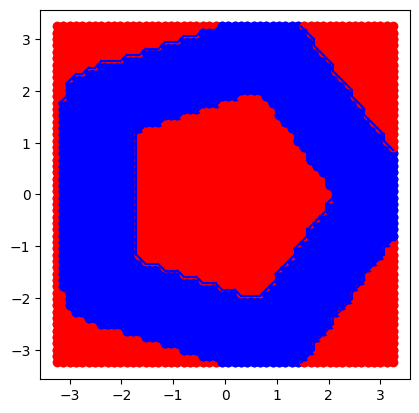

In [22]:

ax = plt.gca()
ax.set_aspect('equal', adjustable='box')

poligon = draw_regular_polygon(5)
poligonosides, poligonpoints = poligon


for i in grid:
    for j in range(4):
        if distance_point_polygon(i[j],poligon) < 0:
            plt.plot(i[j][0],i[j][1],'bo')
        else:
            plt.plot(i[j][0],i[j][1],'ro')


contour_coordinates, countour = marching_squares(grid, poligon)
